In [2]:
pip install pandas numpy

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
print("Setup complete.")

Setup complete.


# Testing notebook used to understand the dataset structure.

In [8]:
def str_to_numpy(input_str):
    """
    str_to_numpy is used to parse the columns "input" and "output" of the dataset csv files.
    It converts a string representing an array of cells to a numpy array containing strings
    which are the names of these cells.
    """
    process_str = input_str.replace("[", "")
    process_str = process_str.replace("'", "")
    process_str = process_str.replace(" ", "")
    process_str = process_str.replace("]", "")
    if(process_str != ""):
        process_str = process_str.split(",")
        output_array = np.asarray(process_str, dtype=str)
    else:
        output_array = np.asarray([], dtype=str)
    return output_array

In [3]:
file = '../input/glioblastoma-radiosensitivity-dataset/glioblastoma_data/extracted_data/cell_behaviors/videos_transcriptions_csv/0gy_n1_201104.nd2u2510GyA3A.csv'
data = pd.read_csv(file, converters = {"input" : str_to_numpy, "output" : str_to_numpy})

data.head()

,time,event,input,output
0,0,begin,[],[C1]
1,66,div,[C1],"[C1.1, C1.2]"
2,238,div,[C1.1],"[C1.1.1, C1.1.2]"
3,386,div,[C1.1.1],"[C1.1.1.1, C1.1.1.2]"
4,432,end,[C1.1.1.1],[]


The data aren't sorted in function of time.

In [31]:
data.sort_values(by="time").head()

,time,event,input,output
0,0,begin,[],[C1]
49,0,begin,[],[C5]
111,0,begin,[],[C8]
23,0,begin,[],[C3]
16,0,begin,[],[C2]


In [5]:
data.describe(include=[object])

,event,input,output
count,125,125,125
unique,6,117,65
top,end,[],[]
freq,59,9,61


In [6]:
data.describe(include="all")

,time,event,input,output
count,125.00000,125,125,125
unique,NaN,6,117,65
top,NaN,end,[],[]
freq,NaN,59,9,61
mean,328.94400,NaN,NaN,NaN
std,147.00051,NaN,NaN,NaN
min,0.00000,NaN,NaN,NaN
25%,256.00000,NaN,NaN,NaN
50%,414.00000,NaN,NaN,NaN
75%,432.00000,NaN,NaN,NaN


## Testing "end" event :

In [7]:
endTest = data[data["event"] == "end"]
endTest.head()

,time,event,input,output
4,432,end,[C1.1.1.1],[]
5,432,end,[C1.1.1.2],[]
7,432,end,[C1.1.2.1],[]
8,432,end,[C1.1.2.2],[]
11,432,end,[C1.2.1.1],[]


In [8]:
endTest.input.describe()

count             59
unique            59
top       [C1.1.1.1]
freq               1
Name: input, dtype: object

The "end" event means that one cell dies (only one at a time).

## Testing "fusion" event

In [9]:
fusionTest = data[data["event"] == "fusion"]
fusionTest.head()

,time,event,input,output
18,153,fusion,"[C2.1, C2.2]",[C2.3]
113,104,fusion,"[C8.1, C8.2]",[C8.3]


In [10]:
fusionTest.input.describe()

count                2
unique               2
top       [C2.1, C2.2]
freq                 1
Name: input, dtype: object

The "fusion" event means that there is one cell less. (only two cells fusion)

## Testing "div" event

In [11]:
divTest = data[data["event"] == "div"]
divTest.head()

,time,event,input,output
1,66,div,[C1],"[C1.1, C1.2]"
2,238,div,[C1.1],"[C1.1.1, C1.1.2]"
3,386,div,[C1.1.1],"[C1.1.1.1, C1.1.1.2]"
6,386,div,[C1.1.2],"[C1.1.2.1, C1.1.2.2]"
9,259,div,[C1.2],"[C1.2.1, C1.2.2]"


In [12]:
divTest.output.describe()

count               53
unique              53
top       [C1.1, C1.2]
freq                 1
Name: output, dtype: object

In [4]:
def biomass(row):
    nb_in = row.input.size
    nb_out = row.output.size
    biomass.last = biomass.last + (nb_out - nb_in)
    row["cellAlive"] = biomass.last
    return row
biomass.last = 0

In [9]:
#data.sort_values(by="time")
biomass.last = 0
timeSeries = data[data["event"] != "end"].sort_values(by="time").apply(biomass, axis=1).groupby("time").agg({"cellAlive" : ["max"]}).reset_index()


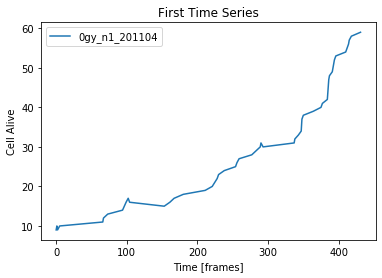

In [10]:
plt.plot(timeSeries.time.to_numpy(), timeSeries.cellAlive.to_numpy(), label="0gy_n1_201104") #label should be automated
plt.title("First Time Series")
plt.xlabel("Time [frames]")
plt.ylabel("Cell Alive")
plt.legend()
plt.show()

There is a problem with the end : it should not appear.
